## 6.01 - Supervised Learning Model Comparison

Recall the "data science process."

1. Define the problem.
2. Gather the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.
Most of the questions requiring a written response can be written in 2-3 sentences.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. When predicting `e401k`, you may use the entire dataframe if you wish.

### Step 2: Gather the data.

##### 1. Read in the data from the repository.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, \
accuracy_score, recall_score, precision_score, classification_report, f1_score
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from datetime import datetime
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read data and  preview data 
df = pd.read_csv('./401ksubs.csv')
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


##### 2. What are 2-3 other variables that, if available, would be helpful to have?

- education level
- work experience
- number of dependents

##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

- it might lead to discrimination

## Step 3: Explore the data.

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

- incsq and agesq
- these features are derived from the other columns

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs might have done this!

- incsq and agesq
- it might be due to fitting of model/data distribution. 

##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

- inc - it is labelled as incsq. it should be inc.

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

- Linear Regression: Coefficients are easily explainable.
- Ridge Regression: Ridge works well if there are many large parameters of about the same value
- Lasso Regression: Lasso tends to do well if there are a small number of significant parameters and the others are close to zero.
- ElasticNet Regression: Combination of Lasso Regression and Ridge Regression.
- Decision tree regressor model: This model will explore features in each node. The top features will be the best predictors.

##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector regressor
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

# EDA

In [3]:
#read data and  preview data 
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [4]:
#Check shape
df.shape

(9275, 11)

In [5]:
#Understand dataset
df.info()
#no null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275 entries, 0 to 9274
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   e401k   9275 non-null   int64  
 1   inc     9275 non-null   float64
 2   marr    9275 non-null   int64  
 3   male    9275 non-null   int64  
 4   age     9275 non-null   int64  
 5   fsize   9275 non-null   int64  
 6   nettfa  9275 non-null   float64
 7   p401k   9275 non-null   int64  
 8   pira    9275 non-null   int64  
 9   incsq   9275 non-null   float64
 10  agesq   9275 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 797.2 KB


In [6]:
#Description of data
df.describe().round(2)

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
count,9275.00,9275.00,9275.00,9275.0,9275.00,9275.00,9275.00,9275.00,9275.00,9275.00,9275.00
mean,0.39,39.25,0.63,0.2,41.08,2.89,19.07,0.28,0.25,2121.19,1793.65
std,0.49,24.09,0.48,0.4,10.30,1.53,63.96,0.45,0.44,3001.47,895.65
min,0.00,10.01,0.00,0.0,25.00,1.00,-502.30,0.00,0.00,100.16,625.00
25%,0.00,21.66,0.00,0.0,33.00,2.00,-0.50,0.00,0.00,469.16,1089.00
50%,0.00,33.29,1.00,0.0,40.00,3.00,2.00,0.00,0.00,1108.09,1600.00
75%,1.00,50.16,1.00,0.0,48.00,4.00,18.45,1.00,1.00,2516.03,2304.00
max,1.00,199.04,1.00,1.0,64.00,13.00,1536.80,1.00,1.00,39617.32,4096.00


In [7]:
#Check for missing values
df.isnull().sum().sum()

0

In [8]:
#Understand the columns header
df.columns

Index(['e401k', 'inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k',
       'pira', 'incsq', 'agesq'],
      dtype='object')

In [9]:
#Scale Data
#Encoding is not needed; it's already done.
X = df[['marr', 'male', 'age', 'fsize', 'nettfa', 'agesq']]
y = df['inc']

ss = StandardScaler()  #scaler object

In [10]:
#Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)  

X_train_ss = ss.fit_transform(X_train)  #scaling training set
X_test_ss = ss.transform(X_test)  #scaling test set

## Linear Regression

In [11]:
#Instantiate the model
reg = LinearRegression()
#Fit the model
reg.fit(X_train_ss, y_train)

LinearRegression()

In [12]:
#Predict data
y_pred = reg.predict(X_test_ss)

In [13]:
#Print results
print(f'RSquare Score (Train): {reg.score(X_train_ss, y_train).round(3)}')
print(f'RSquare Score (Test): {reg.score(X_test_ss, y_test).round(3)}')
rmse = mean_squared_error(y_test, y_pred, squared = False).round(3)
print(f'RMSE is : {rmse}' )

RSquare Score (Train): 0.301
RSquare Score (Test): 0.261
RMSE is : 21.13


In [14]:
#Coefficients of each variable
df_coeff = pd.DataFrame(pd.Series(reg.coef_, index = X.columns).round(3))
df_coeff.rename(columns={0:'Coefficients'}, inplace=True)
df_coeff

,Coefficients
marr,10.145
male,1.115
age,29.139
fsize,-3.210
nettfa,8.576
agesq,-28.958


## Decision Tree Regressor

In [15]:
#Set the parameters
params = {'max_depth': [3,5,6], # Max depth of the tree
          'max_features': ['auto', 'sqrt'], #No. of features to consider when looking for the best split
          'min_samples_leaf': [3, 5, 7], # Min No. of samples required at a leaf node
          'min_samples_split': [0.1, 1.0], # Min. No. of samples required to split an internal node
          'criterion': ['mse'] #Criteria
         }

In [16]:
#Instantiate the model
tree = DecisionTreeRegressor()
gs = GridSearchCV(estimator=tree, param_grid=params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
gs.fit(X_train_ss, y_train)
print(gs.best_estimator_)

DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_leaf=3,
                      min_samples_split=0.1)


In [17]:
#Fit and predict model
tree = gs.best_estimator_
tree.fit(X_train_ss, y_train)
y_pred = tree.predict(X_test)

In [18]:
#Print results
rmse_dt = mean_squared_error(y_test, y_pred, squared=False)
print(f'Score (Train): {tree.score(X_train_ss, y_train).round(3)}')
print(f'Score (Test): {tree.score(X_test_ss, y_test).round(3)}')
print(f'RMSE is : {rmse_dt}' )

Score (Train): 0.384
Score (Test): 0.372
RMSE is : 33.616490750955826


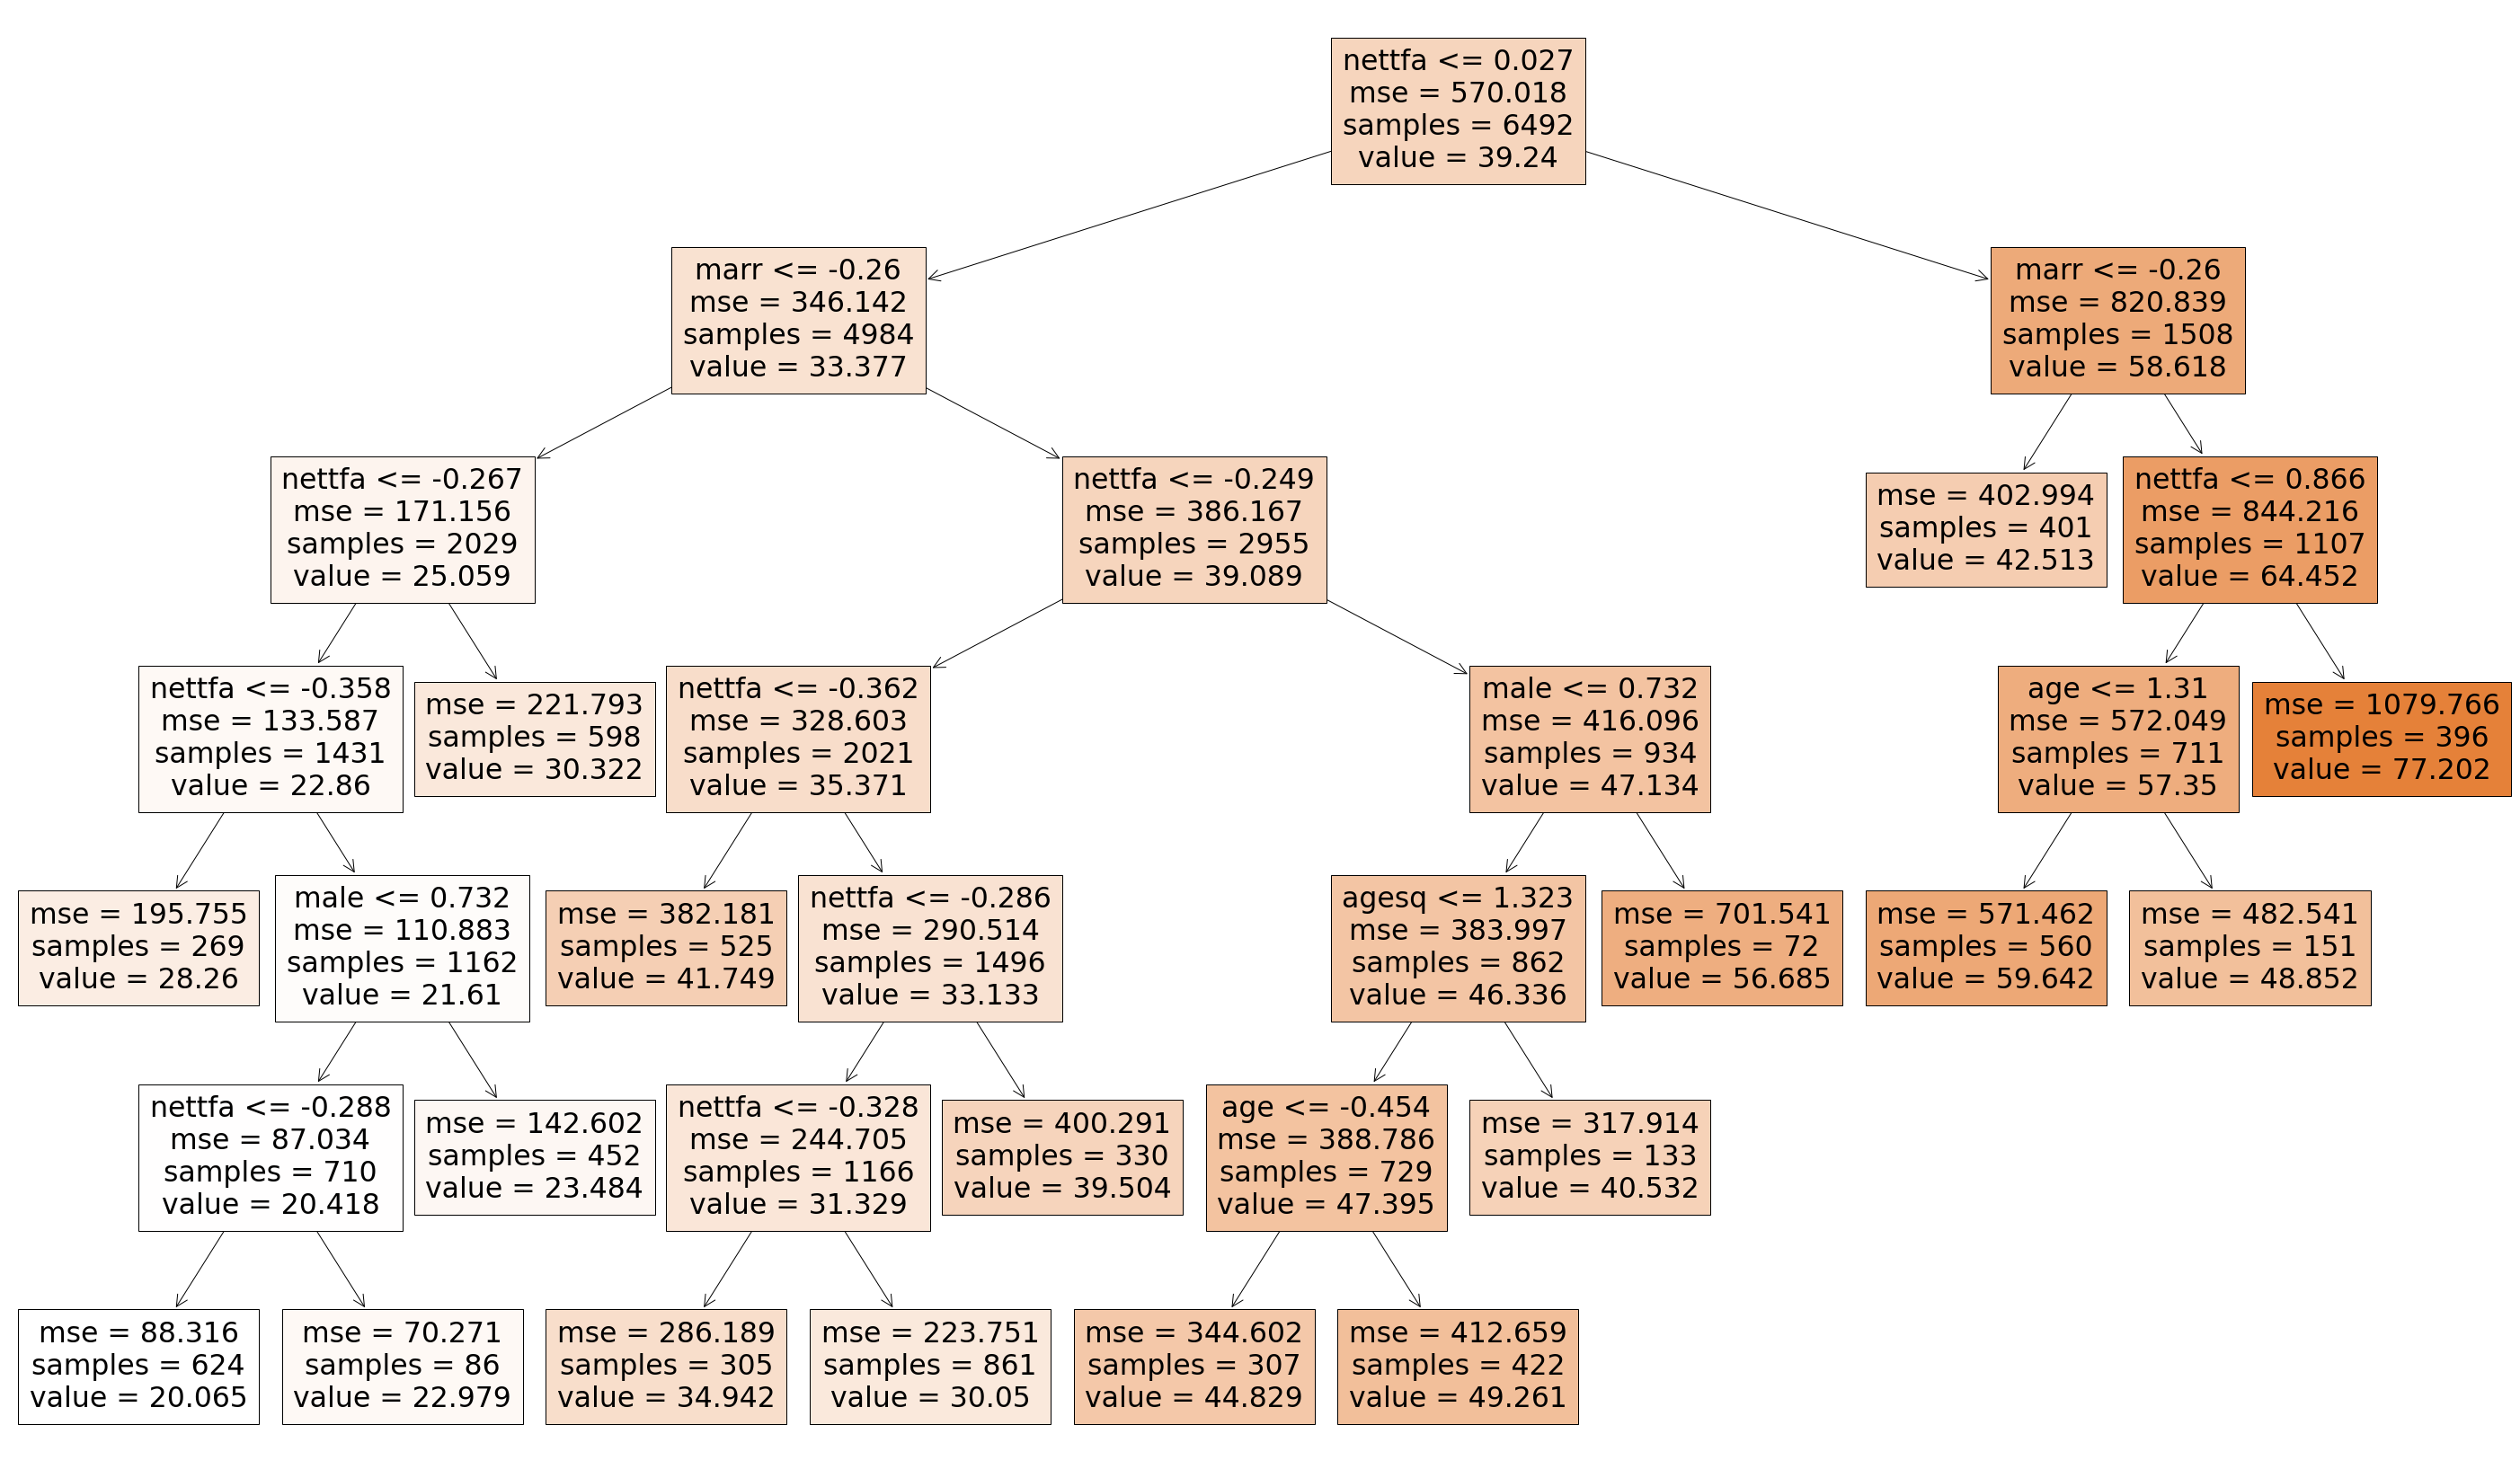

In [19]:
#Plotting of decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (50, 30))
plot_tree(tree, feature_names= X.columns, filled= True);

##### 9. What is bootstrapping?

Random sampling of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once.

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

- In random forests, it forces the tree to use only a subset of its available predictors to split on in the growing phase
- In bagged decision trees, many different trees are generated on similar data. Each trees are strongly correlated to teach other. 

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

- In bagged decision trees, many different trees are generated on similar data. Each trees are strongly correlated to teach other. 
- In random forests, it uses modified tree learning algorithm that selects, at each split in the learning process, a random subset of the features. 

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

- Bagged decision trees are strongly correlated with each other. Hence, it would have high variance. 

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

In [20]:
#RMSE of the 2 models
print(f'RMSE (Linear Regresstion) is : {rmse.round(3)}' )
print(f'RMSE (Decision Tree) is : {rmse_dt.round(3)}' )

RMSE (Linear Regresstion) is : 21.13
RMSE (Decision Tree) is : 33.616


- Decision Tree has a greater RMSE.

##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

- Linear Regression have a bigger difference between training and testing data. 
- Hence, it could slightly overfitted.

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

- Linear Regression - due to lower RMSE, and greater ease of explaination 

##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

- Collect more data
- Look into Interaction data too

## Step 4: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

- Participation and Elgibility could be correlated. 

##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

- Logistic Regression: only for Binary data
- Decision Trees: easy to understand, but risk overfitting
- kNN: easy to implement, but high computation cost

##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector classifier
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [21]:
#Check the columns again
df.columns

Index(['e401k', 'inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k',
       'pira', 'incsq', 'agesq'],
      dtype='object')

In [22]:
#Train, Test, Split
X = df.drop(['e401k', 'p401k'], axis = 'columns')
y = df['e401k']
scaler = StandardScaler()  #scaler object

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state=42, 
                                                    stratify = y)  #splitting into training and test

X_train_ss = scaler.fit_transform(X_train)  #scaling training set
X_test_ss = scaler.transform(X_test)  #scaling test set

## KNN

In [23]:
#Define the parameters
knn_params = {'n_neighbors': range(1, 11, 5),
              'metric': ['euclidean', 'manhattan']} 

# Instantiate the model
knn_gridsearch = GridSearchCV(
                              KNeighborsClassifier(),                 
                              knn_params,             
                              cv=5,
                              verbose=1)

In [24]:
# Fit the GridSearchCV object to the training data
knn_gridsearch.fit(X_train_ss, y_train)
y_preds = knn_gridsearch.predict(X_test_ss)

print(f'kNN best score : {knn_gridsearch.best_score_}')
print(f'kNN best parameters : {knn_gridsearch.best_params_}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
kNN best score : 0.6415603563722716
kNN best parameters : {'metric': 'manhattan', 'n_neighbors': 6}


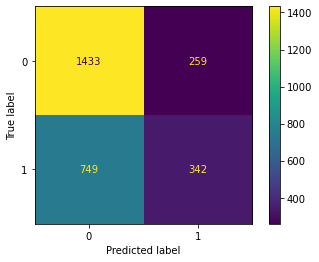

In [25]:
# Generate confusion matrix.
confusion = confusion_matrix(y_test, y_preds)
tn, fp, fn, tp = confusion.ravel()
ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels=knn_gridsearch.classes_).plot();

In [26]:
#Metrics
# Calculate sensitivity (True Positive Rate or Recall)
sens = tp / (tp + fn)
print(f'Sensitivity: {round(sens, 4)}')

# Calculate specificity (True Negative Rate)
spec = tn / (tn + fp)
print(f'Specificity: {round(spec, 4)}')

f1 = f1_score(y_test, y_preds)
print(f'F1 score : {round(f1, 4)}')

Sensitivity: 0.3135
Specificity: 0.8469
F1 score : 0.4043


## Decision Tree

In [27]:
#Set Parameters
params_tree_class = {'max_depth': [2, 3, 5, 7],
                                 'min_samples_split': [5, 10, 15, 20],
                                 'min_samples_leaf': [2, 3, 4, 5, 6],
                                 'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 
                                               10]}

In [28]:
#Instantiate the model                     
tree_class = DecisionTreeClassifier()
grid_tree_class = GridSearchCV(estimator=tree_class, param_grid=params_tree_class , cv=5, verbose=1)
grid_tree_class.fit(X_train_ss, y_train)
print(grid_tree_class.best_estimator_)
tree= grid_tree_class.best_estimator_
y_preds = grid_tree_class.predict(X_test_ss)

print('Decision Tree Regressor\n')
print(f'Score (Train): {grid_tree_class.score(X_train_ss, y_train).round(3)}')
print(f'Score (Test): {grid_tree_class.score(X_test_ss, y_test).round(3)}')
print(f'Decision Tree best parameters : {grid_tree_class.best_params_}')


Fitting 5 folds for each of 480 candidates, totalling 2400 fits
DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=5,
                       min_samples_split=20)
Decision Tree Regressor

Score (Train): 0.694
Score (Test): 0.681
Decision Tree best parameters : {'ccp_alpha': 0, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20}


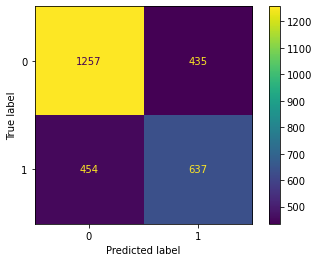

In [29]:
# Generate confusion matrix.
confusion = confusion_matrix(y_test, y_preds)
tn, fp, fn, tp = confusion.ravel()
ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels=grid_tree_class.classes_).plot();

In [30]:
#Calculate 
# Calculate sensitivity (True Positive Rate or Recall)
sens = tp / (tp + fn)
print(f'Sensitivity: {round(sens, 4)}')

# Calculate specificity (True Negative Rate)
spec = tn / (tn + fp)
print(f'Specificity: {round(spec, 4)}')

f1 = f1_score(y_test, y_preds)
print(f'F1 score : {round(f1, 4)}')

Sensitivity: 0.5839
Specificity: 0.7429
F1 score : 0.589


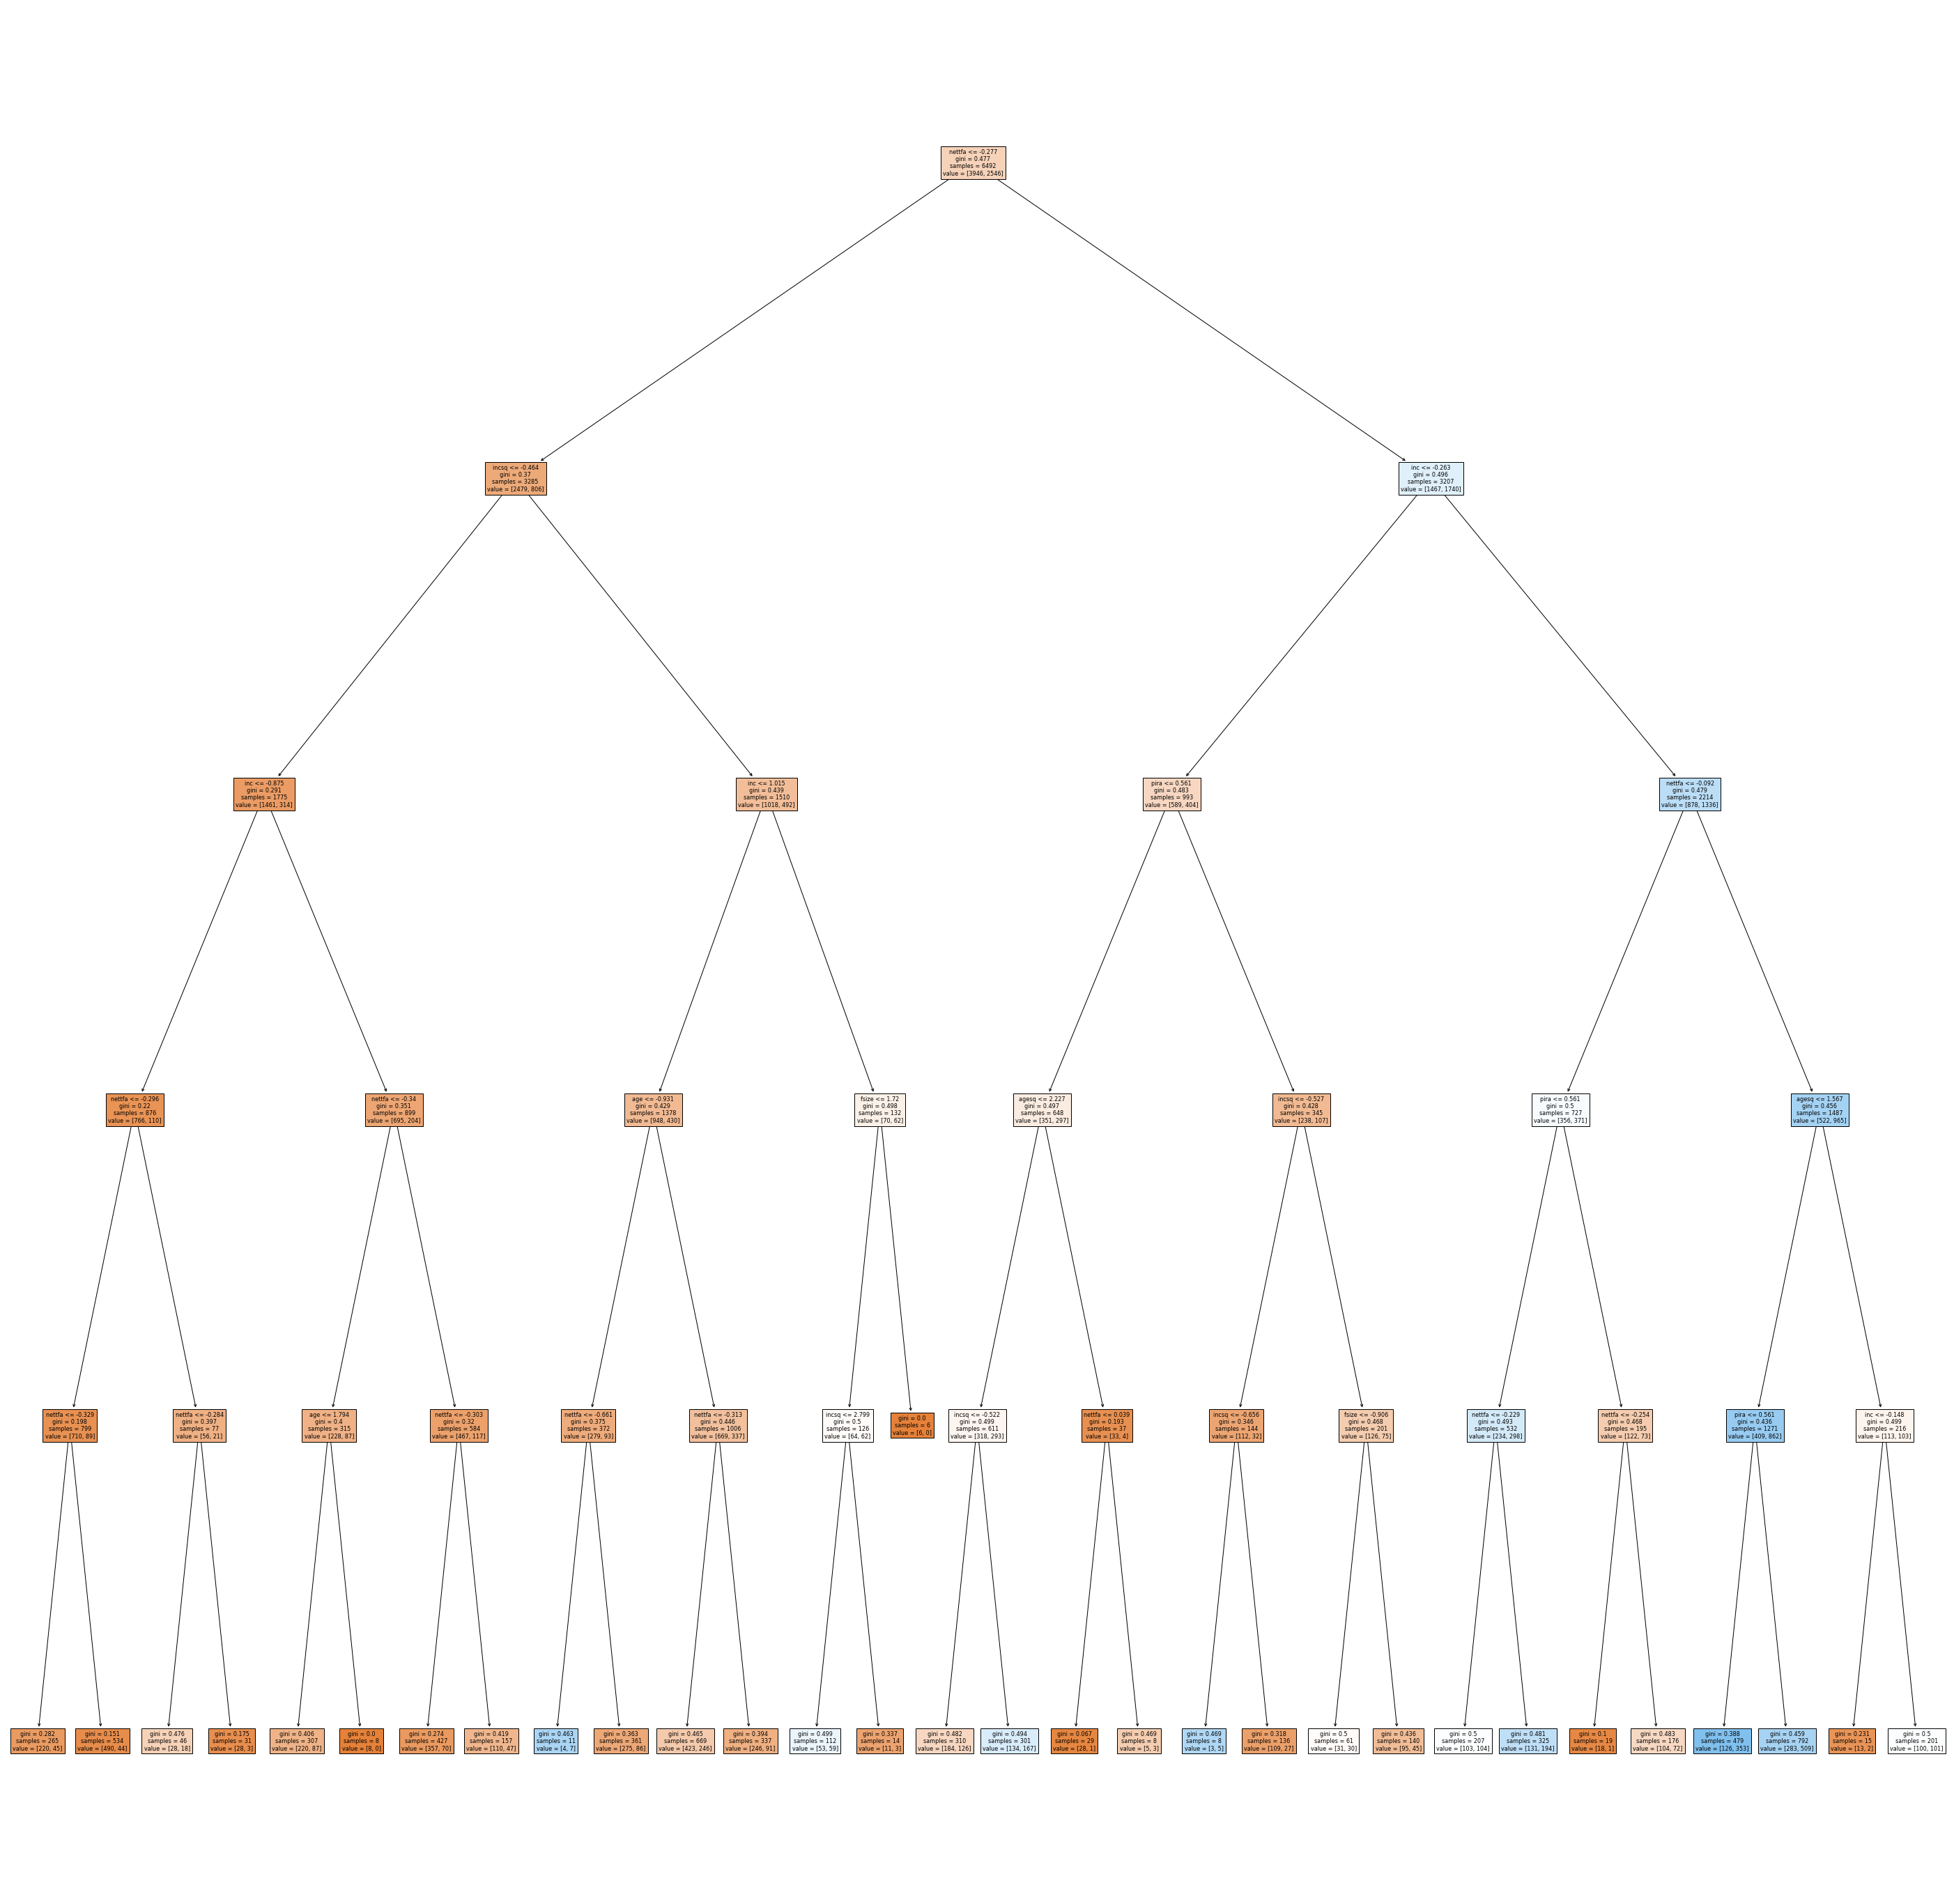

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (50, 50))
plot_tree(tree, feature_names= X.columns, filled= True);

## Step 5: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

- False Positives: Falsely predicted to be eligible. 

In [32]:
fp

435

- Flase Negative: Falsely predicted to not be eligible.

In [33]:
fn

454

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

- Minimize false negatives
- We want to make sure that everyone who is eligible is included.

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

- Optimize Sensitivity.

##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

- F1 scores combines the precision and recall of a classifier into a single metric by taking their harmonic mean

##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

- F1 Score for Decision Tree is higher
    - kNN F1 score : 0.4043
    - Decision Tree F1 score : 0.589

##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

In [34]:
y_preds_train = knn_gridsearch.predict(X_train_ss)
f1_train = f1_score(y_train, y_preds_train)
print(f'kNN F1 (Train): {round(f1_train, 4)}')

y_preds_test = knn_gridsearch.predict(X_test_ss)
f1_test = f1_score(y_test, y_preds_test)
print(f'kNN F1 (Test): {round(f1_test, 4)}')

kNN F1 (Train): 0.5607
kNN F1 (Test): 0.4043


In [35]:
y_preds_train = grid_tree_class.predict(X_train_ss)
f1_train = f1_score(y_train, y_preds_train)
print(f'Decision Tree F1 (Train): {round(f1_train, 4)}')

y_preds_test = grid_tree_class.predict(X_test_ss)
f1_test = f1_score(y_test, y_preds_test)
print(f'Decision Tree F1 (Test): {round(f1_test, 4)}')

Decision Tree F1 (Train): 0.6018
Decision Tree F1 (Test): 0.589


- kNN has a greater difference between Train and Test; Hence, it's slightly overfitting

##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

- Decision Tree as it did not overfit

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

- More feature selection
- Random forest

## Step 6: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

- Regression
    - Best predictors are age, marital status

- Decision Tree Model
    - Sensitivity: 0.5839
    - Specificity: 0.7429